In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [1]:
import tensorflow.keras
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df=pd.read_csv('../input/heart.csv')

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


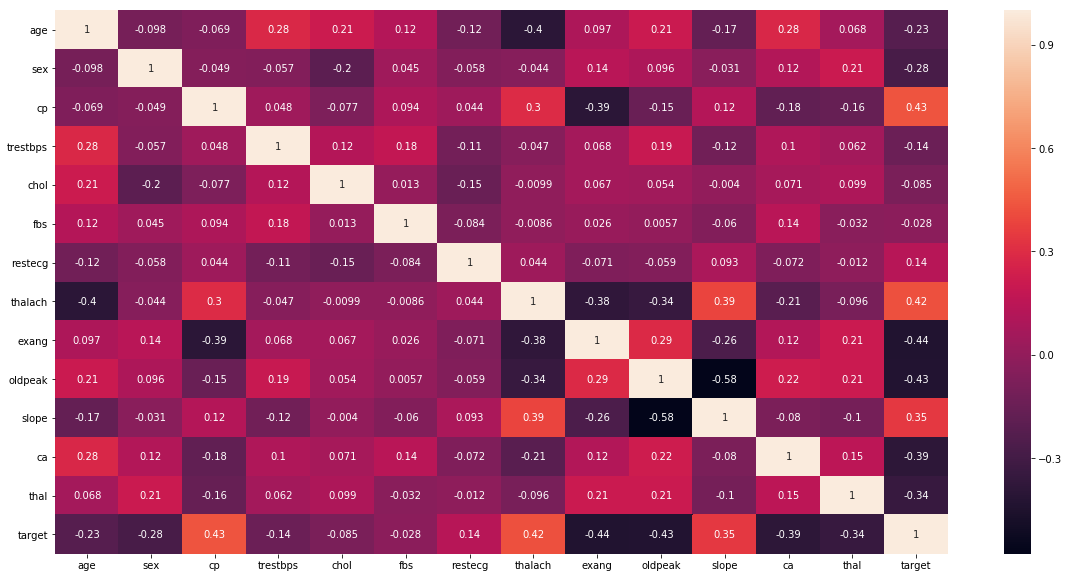

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [21]:
conditions=[(df.chol<200),
            (df.chol<239),
            (df.chol<1000)]
choices=[0,1,2]

df.chol=np.select(conditions, choices)
df.chol.tail(5)

298    2
299    2
300    0
301    0
302    1
Name: chol, dtype: int64

In [23]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

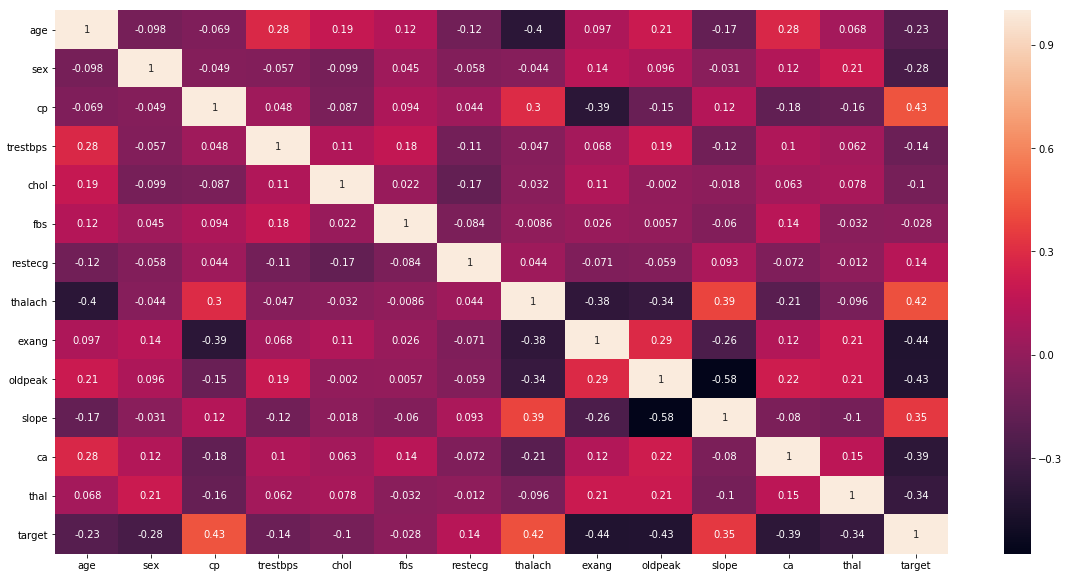

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Text(0,0.5,'count')

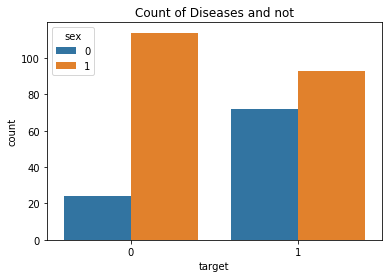

In [24]:
sns.countplot(df.target,hue=df.sex)
plt.title("Count of Diseases and not")
plt.xlabel('target')
plt.ylabel('count')

In [27]:
cols=['age','ca','cp','exang','fbs','oldpeak','restecg','sex','slope','thal','thalach','trestbps','chol']
x=df[cols]
y=df['target']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
classifier=Sequential()

In [48]:
classifier.add(Dense(units=8,activation='relu',input_shape=(13,)))

In [49]:
classifier.add(Dense(units=4,activation='relu'))

In [50]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [51]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
classifier.fit(x_train,y_train,batch_size=20,nb_epoch=20,validation_split=0.2)

Train on 193 samples, validate on 49 samples
Epoch 1/20
193/193 [==============================] - 1s 3ms/step - loss: 0.6836 - acc: 0.5751 - val_loss: 0.6649 - val_acc: 0.5714
Epoch 2/20
193/193 [==============================] - 0s 268us/step - loss: 0.6705 - acc: 0.6062 - val_loss: 0.6523 - val_acc: 0.5918
Epoch 3/20
193/193 [==============================] - 0s 251us/step - loss: 0.6587 - acc: 0.6218 - val_loss: 0.6419 - val_acc: 0.5918
Epoch 4/20
193/193 [==============================] - 0s 277us/step - loss: 0.6480 - acc: 0.6477 - val_loss: 0.6319 - val_acc: 0.6122
Epoch 5/20
193/193 [==============================] - 0s 248us/step - loss: 0.6392 - acc: 0.6528 - val_loss: 0.6225 - val_acc: 0.6122
Epoch 6/20
193/193 [==============================] - 0s 259us/step - loss: 0.6301 - acc: 0.6684 - val_loss: 0.6134 - val_acc: 0.6327
Epoch 7/20
193/193 [==============================] - 0s 293us/step - loss: 0.6215 - acc: 0.6736 - val_loss: 0.6034 - val_acc: 0.6327
Epoch 8/20
193/193 

In [56]:
y_pred=classifier.predict(x_test)

In [57]:
y_pred=(y_pred>0.5)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[16 11]
 [ 2 32]]


              precision    recall  f1-score   support

           0       0.89      0.59      0.71        27
           1       0.74      0.94      0.83        34

   micro avg       0.79      0.79      0.79        61
   macro avg       0.82      0.77      0.77        61
weighted avg       0.81      0.79      0.78        61

